# Numerical Integration

Our general rule for numerical integration is
$$
\int_a^b f(x)\,\mathrm{d}x \approx (b-a)\sum_{i=1}^N w_if(x_i)
$$
for suitable weights $w_i$ and places $x_i$ to evaluate the function. For the trapezoid and Simpson's rule calculations, the $x_i$ must be evenly spaced; we'll denote the spacing between them by $h$. Then the input to our python function will be a numpy array `d` containing $f(x_i)$. We will need to calculate a suitable weighting array `w` containing the $w_i$ values. Since array multiplication is componentwise, we can then simply calculate `d*w`. The sum is easily evaluated using the Python built-in `sum` function.

For the trapezoid rule, the weights array should be
$$
w = \tfrac1N\times(\tfrac12, 1, 1, \dots, 1, \tfrac12).
$$
Rewriting the integral in a more convenient form, we have
$$
\int_a^b f(x)\,\mathrm{d}x \approx h\sum_{i=1}^N v_if(x_i)
$$
with
$$
v = (\tfrac12, 1, 1, \dots, 1, \tfrac12).
$$

To compute the integral in this way we will need to construct the weighting arrays.

In [14]:
import numpy as np
from numpy import ones, array, empty, zeros

**Writing a Python function `trapezoid(d, h)` that returns the estimated integral over the points `d` (in the notation above), using the trapezoid rule.**

In [15]:
from numpy import linspace, logspace, cos, pi, exp, sqrt

In [16]:
def trapezoid(d, h):

    npt = d.size
    w = ones(npt)
    w[0:] = 1
    w[0] = 1/2
    w[npt-1] = 1/2


    integral = h*sum(d*w)
    return integral

Testing our function, we’ll calculate $\int_0^{\pi/2}\cos(x)\,\mathrm{d}x = 1$.

In [17]:
x = linspace(0, 1, 100)
y = cos(x)
print(trapezoid(y, x[1] - x[0]))

0.8414638301602779


**Writing a loop to repeat the same calculation with the number $N$ of steps varying from $10$ to $10^7$. Reporting the error for each step size also.**

In [18]:
err_trap = []

for N in (logspace(1,7,7)+1).astype(int):
    x = linspace(0, pi/2, N)
    y = cos(x)
    err_trap.append(abs(1-trapezoid(y, x[1] - x[0])))
    print(trapezoid(y, x[1] - x[0]))
    
err_trap

0.9979429863543573
0.9999794382396076
0.9999997943832332
0.9999999979438344
0.9999999999794293
0.9999999999998086
0.9999999999999609


[0.0020570136456427024,
 2.0561760392445727e-05,
 2.056167668351705e-07,
 2.0561655711404114e-09,
 2.057065628946475e-11,
 1.91402449445377e-13,
 3.907985046680551e-14]

For Simpson’s rule, on the other hand, the weights array should be
$$
v = \tfrac13\times(1, 4, 2, 4, 2, \dots, 4, 2, 4, 1).
$$

**Writing a Python function `simpson(d, h)` that works in the same way to calculate an integral using Simpson’s rule.**

Note that because Simpson's rule combines contributions from adjacent intervals it must be used with an even number of intervals (and the minimum number of intervals is 2).  In terms of points, Simpson's rule must use an odd number of points (>3).

In [19]:
def simpson(d, h):
    npt = d.size
    w = ones(npt)
    w[0::2] = 2
    w[1::2] = 4
    w[0] = 1
    w[npt-1] = 1
    w = w/3
    integral = h*sum(d*w)
    return integral

Testing our function again, we’ll calculate $\int_0^{\pi/2}\cos(x)\,\mathrm{d}x = 1$.

In [20]:
x = linspace(0, 1, 100)
y = cos(x)
print(simpson(y, x[1] - x[0]))

0.8396374757809344


**Repeating the loop from above, again reporting the error at each step size.**

In [21]:
err_simp = []

for N in (logspace(1,7,7)+1).astype(int):
    x = linspace(0, pi/2, N)
    y = cos(x)
    err_simp.append(abs(1-simpson(y, x[1] - x[0])))
    print(simpson(y, x[1] - x[0]))

err_simp
# As you can see, simpson's method is accurate

1.0000033922209006
1.0000000003382359
1.000000000000032
0.999999999999999
1.0000000000000009
1.0000000000000262
1.0000000000000642


[3.3922209006220783e-06,
 3.3823588374559677e-10,
 3.197442310920451e-14,
 9.992007221626409e-16,
 8.881784197001252e-16,
 2.6201263381153694e-14,
 6.417089082333405e-14]

**Plotting on the same log-log axes the error against the step size for these two algorithms.**

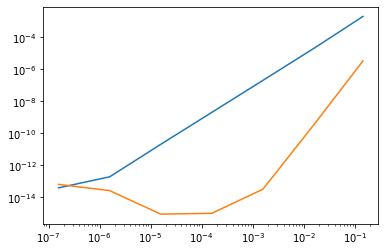

In [22]:
step_size = [pi/(2*N) for N in logspace(1,7,7)+1]

%matplotlib inline
from pylab import loglog, xlabel, ylabel, title, legend, figure
from matplotlib import pyplot as plt
figure()
loglog(step_size,err_trap)
loglog(step_size,err_simp)

**Lets try the integral**
$$
\int_0^1 \exp(-x)\,\mathrm{d}x = 1 - e^{-1}.
$$


0.6321209095890152
0.6321205588636751
0.6321205588285606
0.6321205588285566
0.6321205588285519
0.6321205588285626
0.6321205588285542
[3.5076045756810004e-07, 3.5117464491918327e-11, 2.886579864025407e-15, 1.1102230246251565e-15, 5.773159728050814e-15, 4.884981308350689e-15, 3.4416913763379853e-15]


Text(0, 0.5, 'Error')

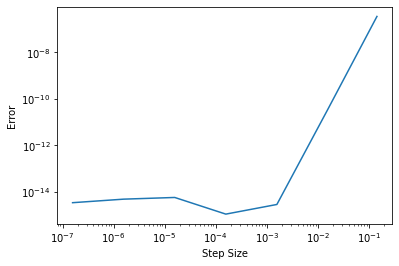

In [23]:
err_simp2 = []

for N in (logspace(1,7,7)+1).astype(int):
    x = linspace(0, 1, N)
    y = exp(-x)
    err_simp2.append(abs((1-exp(-1))-simpson(y, x[1] - x[0])))
    print(simpson(y, x[1] - x[0]))

print(err_simp2)

%matplotlib inline
from pylab import loglog, xlabel, ylabel, title, legend, figure
from matplotlib import pyplot as plt
figure()
loglog(step_size, err_simp2)
plt.xlabel('Step Size')
plt.ylabel('Error')

## Gaussian quadrature

A more sophisticated method is Gaussian quadrature. We will explore this briefly using our own code, but then move to using precompiled Fortran code provided by the `scipy` package to implement this method.

For two-point Gaussian quadrature from $a$ to $b$, the $x$ values should be
$$
x = a + \left(\frac12 \pm \frac{1}{2\sqrt{3}}\right)(b - a)
$$
each point should have weight $w_i = \frac12$.

**Using two-point Gaussian quadrature to evaluate the same two integrals, $\int_0^{\pi/2}\cos(x)\,\mathrm dx$ and $\int_0^1 \exp(-x)\,\mathrm{d}x$.**

In [24]:
def gauss_quad(f, l, u, true_value):
    a = l
    b = u
    w = 0.5
    x1 = a + ((0.5 + (1/(2*sqrt(3))))*(b-a))
    x2 = a + ((0.5 - (1/(2*sqrt(3))))*(b-a))

    sum1 = (b-a)*(w*(f(x1) + f(x2)))
    err = abs((sum1 - true_value)/true_value)

    return sum1, err

def f(x):
    return cos(x)

def g(x):
    return exp(-x)

f_sum, f_error = gauss_quad(f, 0, pi/2, 1)
g_sum, g_error = gauss_quad(g, 0, 1, (1-exp(-1)))

print('Integral = ', f_sum, 'Error in cosx = ', f_error)
print('Integral = ', g_sum, 'Error in exp(-x) = ', g_error)

Integral =  0.9984726134041151 Error in cosx =  0.0015273865958849164
Integral =  0.6319787595318455 Error in exp(-x) =  0.00022432318444916592


**Importing the `quad` function** from the module `scipy.integrate`.

**Evaluating the two integrals above once again** and comparing the absolute error to the best values obtained by the methods we've discussed so far; to the estimate provided by `quad` itself; and to the machine epsilon.

In [25]:
from scipy.integrate import quad
y = lambda x: cos(x)
y2 = lambda x: (x**2)*(np.sin(exp(-x))*np.sin(exp(-x)))
print(quad(y, 0, pi/2))
print(quad(y2, 0, 1))

(0.9999999999999999, 1.1102230246251564e-14)
(0.0732685394155638, 8.134441943981474e-16)


In [26]:
from sys import float_info
float_info.epsilon

2.220446049250313e-16